<a href="https://colab.research.google.com/github/jeriko13/skripsi/blob/main/Titik_Embun_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import files

# Mengupload file dari lokal ke Colab
uploaded = files.upload()

# Memindahkan file yang telah diupload ke direktori Colab
for filename in uploaded.keys():
  !mv "{filename}" /content/


In [57]:
# read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("df_rainfall.csv" ,na_values=0,header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])
#df
# Memilih hanya 50 baris data pertama
df_50 = df.iloc[:50]

# Menampilkan 50 baris data pertama

df.head(50)

,Date,dewpoint,temperature,rainfall
0,01/01/2017,"297,691","303,931","0,01"
1,02/01/2017,"297,72","303,498","0,012"
2,03/01/2017,"297,736","302,315","0,02"
3,04/01/2017,"297,772","302,133","0,016"
4,05/01/2017,"297,78","302,281","0,014"
5,06/01/2017,"297,758","302,529","0,002"
6,07/01/2017,"297,504","303,647","0,003"
7,08/01/2017,"297,401","303,459","0,003"
8,09/01/2017,"297,697","301,818","0,018"
9,10/01/2017,"297,777","302,498","0,012"


In [58]:
#menampilkan daftar kolom pada DataFrame.
df.columns

Index(['Date', 'dewpoint', 'temperature', 'rainfall'], dtype='object')

In [59]:
#Untuk menghapus baris yang memiliki nilai NaN di semua kolom
df.dropna(how='all', inplace=True)


In [60]:
#mengetahui jumlah baris data
df.tail

<bound method NDFrame.tail of           Date dewpoint temperature rainfall
0   01/01/2017  297,691     303,931     0,01
1   02/01/2017   297,72     303,498    0,012
2   03/01/2017  297,736     302,315     0,02
3   04/01/2017  297,772     302,133    0,016
4   05/01/2017   297,78     302,281    0,014
5   06/01/2017  297,758     302,529    0,002
6   07/01/2017  297,504     303,647    0,003
7   08/01/2017  297,401     303,459    0,003
8   09/01/2017  297,697     301,818    0,018
9   10/01/2017  297,777     302,498    0,012
10  11/01/2017  297,851     302,931    0,005
11  12/01/2017  297,885      303,57     0,02
12  13/01/2017  297,665     302,621    0,004
13  14/01/2017  297,003     301,931    0,021
14  15/01/2017  297,069     302,465    0,001
15  16/01/2017  297,258     302,138    0,008
16  17/01/2017  297,159     302,415    0,006
17  18/01/2017  297,181     302,668    0,006
18  19/01/2017  297,275     303,205    0,012
19  20/01/2017  297,228     303,056    0,007
20  21/01/2017  297,389  

In [61]:
#mengubah , menjadi .
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

In [62]:
#mengubah tipe data ke numerik
pd.to_numeric(df['dewpoint'], errors='coerce')
pd.to_numeric(df['temperature'], errors='coerce')
pd.to_numeric(df['rainfall'], errors='coerce')


0     0.010
1     0.012
2     0.020
3     0.016
4     0.014
5     0.002
6     0.003
7     0.003
8     0.018
9     0.012
10    0.005
11    0.020
12    0.004
13    0.021
14    0.001
15    0.008
16    0.006
17    0.006
18    0.012
19    0.007
20    0.012
21    0.018
22    0.011
23    0.015
24    0.012
25    0.002
26    0.007
27    0.006
28    0.012
29    0.002
30    0.010
31    0.016
32    0.005
33    0.006
34    0.014
35    0.002
36    0.005
37    0.006
38    0.007
39    0.015
40    0.018
41    0.015
42    0.004
43    0.032
44    0.015
45    0.015
46    0.004
47    0.009
48    0.004
49    0.011
50    0.006
Name: rainfall, dtype: float64

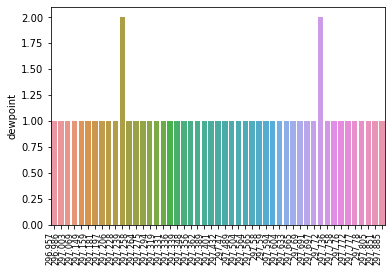

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# mengambil data titik embun yang tidak kosong
df_clean = df.dropna(subset=['dewpoint'])

# membuat plot bar
ax = sns.barplot(x=df_clean["dewpoint"].value_counts().index, y=df_clean["dewpoint"].value_counts())

# menambahkan jarak antara label pada sumbu x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)

# menampilkan plot
plt.show()


In [64]:
#untuk mengecek tipe data
print(df['Date'].dtype)
print(df['dewpoint'].dtype)
print(df['temperature'].dtype)
print(df['rainfall'].dtype)


object
float64
float64
float64


In [65]:
#Code tersebut melakukan konversi kolom dalam dataframe (df) menjadi tipe data numerik 
df['dewpoint'] = pd.to_numeric(df['dewpoint'], errors='coerce')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['rainfall'] = pd.to_numeric(df['rainfall'], errors='coerce')

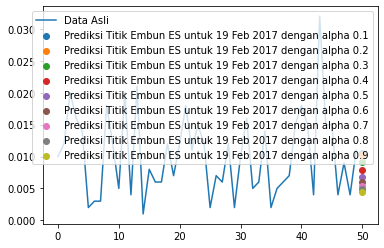

MAE:  [0.005345849208012078, 0.005333273134111901, 0.005450322910316479, 0.005555319488044812, 0.005602950927714147, 0.005734335466799943, 0.006005611385733631, 0.0063063608951292125, 0.00661629343044276]
MAPE:  [108.80260380823489, 112.3995831511766, 116.09347262406338, 118.74256493652162, 120.48949576678135, 123.03658035784213, 127.08168592768978, 132.08747986864245, 137.76714159357266]
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017:  [0.01056968655878876, 0.010218358205918876, 0.009107577567244672, 0.007867925110672032, 0.006802161507542387, 0.005981700869522233, 0.005370391926690898, 0.0048917940994763, 0.004461143126188812]


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['rainfall'].values[:50]

# Membuat fungsi untuk exponential smoothing
def exponential_smoothing(alpha, data):
    f = [data[0]]
    for t in range(1, len(data)):
        f_t = f[t-1] + alpha*(data[t-1]-f[t-1])
        f.append(f_t)
    return f

# Menghitung exponential smoothing dengan alpha 0.1-0.9
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prediksi = []
for a in alpha:
    f = exponential_smoothing(a, data)
    prediksi.append(f[-1])

# Menampilkan data asli dan hasil prediksi
plt.plot(data, label='Data Asli')
for a, p in zip(alpha, prediksi):
    plt.scatter(50, p, label='Prediksi Titik Embun ES untuk 19 Feb 2017 dengan alpha {}'.format(a))
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = []
mape = []
for a in alpha:
    f = exponential_smoothing(a, data)
    mae.append(np.mean(np.abs(data - f)))
    mape.append(np.mean(np.abs((data - f) / data)) * 100)

# Menampilkan hasil evaluasi
print("MAE: ", mae)
print("MAPE: ", mape)
print("Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: ", prediksi)



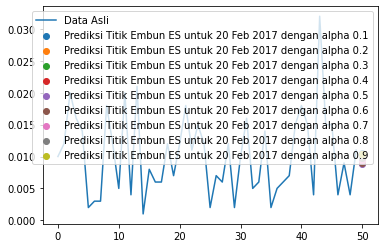

MAE:  [0.005345849208012078, 0.005333273134111901, 0.005450322910316479, 0.005555319488044812, 0.005602950927714147, 0.005734335466799943, 0.006005611385733631, 0.0063063608951292125, 0.00661629343044276]
MAPE:  [108.80260380823489, 112.3995831511766, 116.09347262406338, 118.74256493652162, 120.48949576678135, 123.03658035784213, 127.08168592768978, 132.08747986864245, 137.76714159357266]
Prediksi Titik Embun ES untuk 20 Feb 2017:  [0.010612717902909885, 0.0103746865647351, 0.00967530429707127, 0.00912075506640322, 0.008901080753771193, 0.008992680347808892, 0.009311117578007268, 0.00977835881989526, 0.01034611431261888]


In [67]:
# Mengambil 51 data pertama (termasuk data pada tanggal 20 Feb 2017)
data = df['rainfall'].values[:51]

# Membuat prediksi dengan alpha 0.1-0.9
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prediksi = []
for a in alpha:
    f = exponential_smoothing(a, data)
    prediksi.append(f[-1])

# Menampilkan data asli dan hasil prediksi
plt.plot(data[:-1], label='Data Asli')
for a, p in zip(alpha, prediksi):
    plt.scatter(50, p, label='Prediksi Titik Embun ES untuk 20 Feb 2017 dengan alpha {}'.format(a))
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = []
mape = []
for a in alpha:
    f = exponential_smoothing(a, data)
    mae.append(np.mean(np.abs(data[:-1] - f[:-1])))
    mape.append(np.mean(np.abs((data[:-1] - f[:-1]) / data[:-1])) * 100)

# Menampilkan hasil evaluasi
print("MAE: ", mae)
print("MAPE: ", mape)
print("Prediksi Titik Embun ES untuk 20 Feb 2017: ", prediksi)


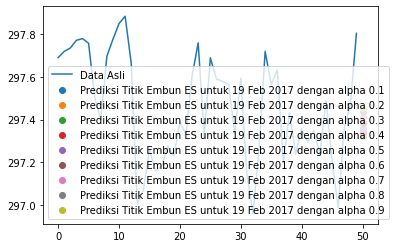

Evaluasi Model dengan alpha 0.1
MAE: 0.18914223570069907
MAPE: 0.06360826134340983
MSE: 0.058856584005289286
RMSE: 0.24260375925630107
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.3488178648876

Evaluasi Model dengan alpha 0.2
MAE: 0.17949672720993134
MAPE: 0.06035865544728585
MSE: 0.05521292080520279
RMSE: 0.23497429818004095
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.3212665069183

Evaluasi Model dengan alpha 0.3
MAE: 0.1721617149077656
MAPE: 0.0578899663093775
MSE: 0.05340795665069089
RMSE: 0.2311016154220712
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.3238804205924

Evaluasi Model dengan alpha 0.4
MAE: 0.16882419828852335
MAPE: 0.056766963460299615
MSE: 0.05209602068449007
RMSE: 0.2282455271949268
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.33909857051674

Evaluasi Model dengan alpha 0.5
MAE: 0.16738674071400056
MAPE: 0.05628342916577083
MSE: 0.051158522304958695
RMSE: 0.22618249778654115
Predik

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['dewpoint'].values[:50]

# Membuat fungsi untuk exponential smoothing
def exponential_smoothing(alpha, data):
    f = [data[0]]
    for t in range(1, len(data)):
        f_t = f[t-1] + alpha*(data[t-1]-f[t-1])
        f.append(f_t)
    return f

# Menghitung exponential smoothing dengan alpha 0.1-0.9
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prediksi = []
for a in alpha:
    f = exponential_smoothing(a, data)
    prediksi.append(f[-1])

# Menampilkan data asli dan hasil prediksi
plt.plot(data, label='Data Asli')
for a, p in zip(alpha, prediksi):
    plt.scatter(50, p, label='Prediksi Titik Embun ES untuk 19 Feb 2017 dengan alpha {}'.format(a))
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = []
mape = []
mse = []
rmse = []
for a in alpha:
    f = exponential_smoothing(a, data)
    mae.append(np.mean(np.abs(data - f)))
    mape.append(np.mean(np.abs((data - f) / data)) * 100)
    mse.append(mean_squared_error(data, f))
    rmse.append(np.sqrt(mean_squared_error(data, f)))

# Menampilkan hasil evaluasi
for i, a in enumerate(alpha):
    print("============================================================================")
    print(f"Evaluasi Model dengan alpha {a}")
    print(f"MAE: {mae[i]}")
    print(f"MAPE: {mape[i]}")
    print(f"MSE: {mse[i]}")
    print(f"RMSE: {rmse[i]}")
    
    print(f"Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: {prediksi[i]}")
    print("")
    print("============================================================================")

Evaluasi Model dengan alpha 0.1
MAE: 0.18914223570069907
MAPE: 0.06360826134340983
MSE: 0.058856584005289286
RMSE: 0.24260375925630107
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.3488178648876

Evaluasi Model dengan alpha 0.2
MAE: 0.17949672720993134
MAPE: 0.06035865544728585
MSE: 0.05521292080520279
RMSE: 0.23497429818004095
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.3212665069183

Evaluasi Model dengan alpha 0.3
MAE: 0.1721617149077656
MAPE: 0.0578899663093775
MSE: 0.05340795665069089
RMSE: 0.2311016154220712
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.3238804205924

Evaluasi Model dengan alpha 0.4
MAE: 0.16882419828852335
MAPE: 0.056766963460299615
MSE: 0.05209602068449007
RMSE: 0.2282455271949268
Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017: 297.33909857051674

Evaluasi Model dengan alpha 0.5
MAE: 0.16738674071400056
MAPE: 0.05628342916577083
MSE: 0.051158522304958695
RMSE: 0.22618249778654115
Predik

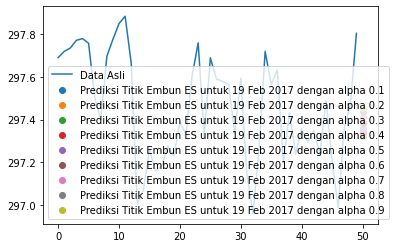

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['dewpoint'].values[:50]

# Membuat fungsi untuk exponential smoothing
def exponential_smoothing(alpha, data):
    f = [data[0]]
    for t in range(1, len(data)):
        f_t = f[t-1] + alpha*(data[t-1]-f[t-1])
        f.append(f_t)
    return f

# Menghitung exponential smoothing dengan alpha 0.1-0.9
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
prediksi = []
mae = []
mape = []
mse = []
rmse = []
for a in alpha:
    f = exponential_smoothing(a, data)
    prediksi.append(f[-1])
    mae.append(np.mean(np.abs(data - f)))
    mape.append(np.mean(np.abs((data - f) / data)) * 100)
    mse.append(mean_squared_error(data, f))
    rmse.append(np.sqrt(mean_squared_error(data, f)))

    # Menampilkan hasil evaluasi untuk setiap alpha
    print("Evaluasi Model dengan alpha", a)
    print("MAE:", mae[-1])
    print("MAPE:", mape[-1])
    print("MSE:", mse[-1])
    print("RMSE:", rmse[-1])
    print("Prediksi Titik Embun Exponential Smoothing untuk 19 Feb 2017:", prediksi[-1])
    print()

# Menampilkan data asli dan hasil prediksi
plt.plot(data, label='Data Asli')
for a, p in zip(alpha, prediksi):
    plt.scatter(50, p, label='Prediksi Titik Embun ES untuk 19 Feb 2017 dengan alpha {}'.format(a))
plt.legend()
plt.show()
